In [23]:
from wordcloud import WordCloud
import pandas as pd 
import re 
from nltk.tokenize import word_tokenize
import matplotlib.pylab as plt 
import numpy as np
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import plotly.express as px

#### Read Data 

In [2]:
jobs_data = pd.read_csv("jobs.csv")
print("shape of the data: " , jobs_data.shape)
jobs_data.head(5)

shape of the data:  (341, 6)


,Unnamed: 0,job_title,company_name,job_location,job_requirement,job_description
0,0,Software Engineer,qTech. -,"Mansoura, Dakahlia, Egypt",More than 1 year of experience.Bachelor’s degr...,Using the software as intended to analyze its ...
1,1,Software Engineer,HITS Solutions -,"Nasr City, Cairo, Egypt",Job Requirements:Bachelor’s Degree in computer...,"General duties and responsibilities:Design, bu..."
2,2,Software Engineer,Noases -,"Cairo, Egypt",Bachelor of Science degree or higher in Compu...,Understand the problem and requirements and cr...
3,3,Software Engineer,SE Wiring Systems EGYPT -,"6th of October, Giza, Egypt",Bachelor degree in computer scienceFresh gradu...,Support both the IT manager & Central IT engin...
4,4,Software Engineer,eelu -,"Dokki, Giza, Egypt",Qualifications:BSc degree from Telecommunicati...,Responsible for all network and security relat...


#### Geographic distribution. 

In [3]:
counter = 0
cities = []
locations = []
count_list = {}

location = jobs_data.iloc[:,3]

for l in location:
    tokens = word_tokenize(l.lower())
    tokens = [token for token in tokens if token.isalpha()]
    locations.append(tokens)

for lo in locations:
    try:
        cities.append(lo[-2])
    except IndexError:
        continue
        # print(lo)

citiesDF = pd.DataFrame(cities)
citiesDF.columns = ["cities"]

codes = citiesDF["cities"].unique()
codes_np = np.array(list(codes))

citiesDF_np = np.array(citiesDF)

for code in codes_np:
    for city in citiesDF_np :
        if city[0] == code:
            counter+=1 
    count_list.update({
        code : counter
    })
    counter = 0  

# count_list = dict(sorted(count_list.items(), key=lambda item: item[1],reverse=True))
chosen_city = ["cairo","giza","alexandria","sharqia","dakahlia","damietta","gharbia","minya","suef","assiut","beheira","said","sinai"]
counting = []
for item in chosen_city:
    counting.append(count_list[item])

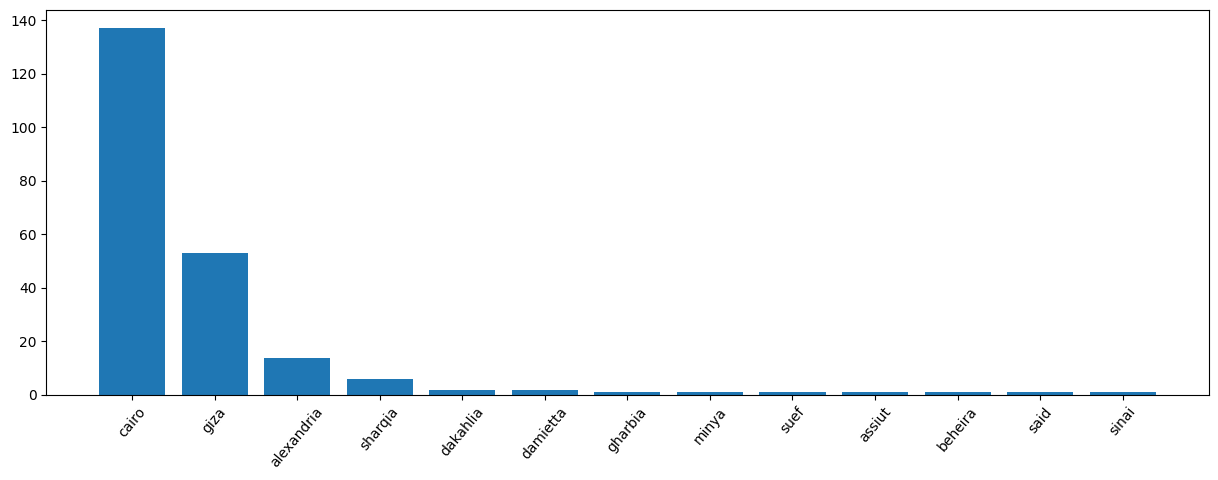

In [4]:
plt.figure(figsize=(15,5))
plt.bar(chosen_city,counting)
plt.xticks(rotation = 50)
plt.show()

In [22]:
l = []
l.append(counting)
fig = px.imshow(l,x=chosen_city,labels=dict(x = 'City'))
fig.show()  

#### Most common job title

In [6]:
jobsNum = jobs_data["job_title"].value_counts()
print("jobs title and number of each job valid:")
print(jobsNum.sort_values(ascending=False))

jobs title and number of each job valid:
Customer Service     120
Accountant            81
Web Developer         57
Civil Engineer        56
Software Engineer     25
Flutter Developer      2
Name: job_title, dtype: int64


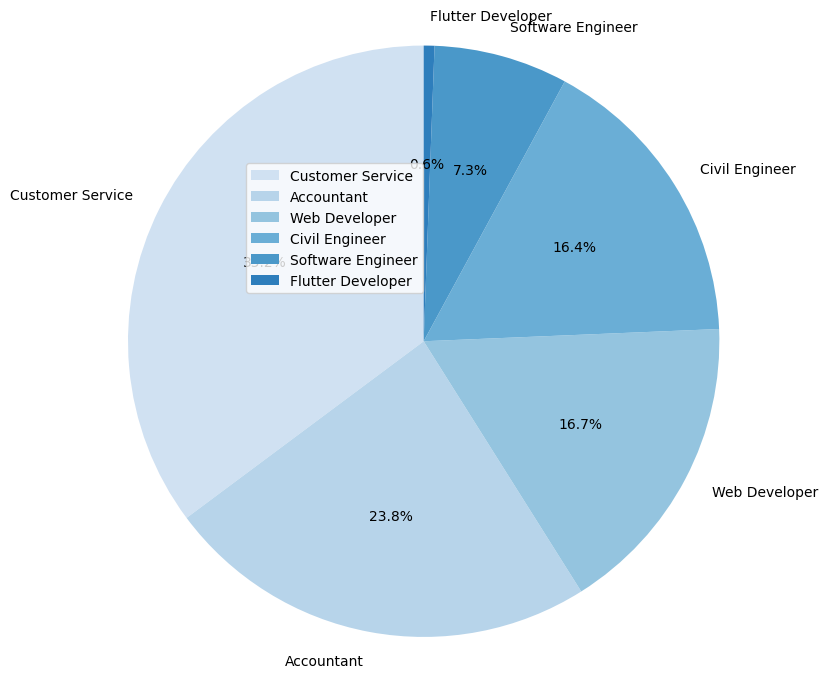

In [7]:
jobsName = ["Customer Service","Accountant", 'Web Developer','Civil Engineer','Software Engineer','Flutter Developer']

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(jobsName)))
plt.pie(jobsNum,colors=colors,labels=jobsName,startangle=90,radius=2,autopct='%1.1f%%')
plt.legend()
plt.show()  


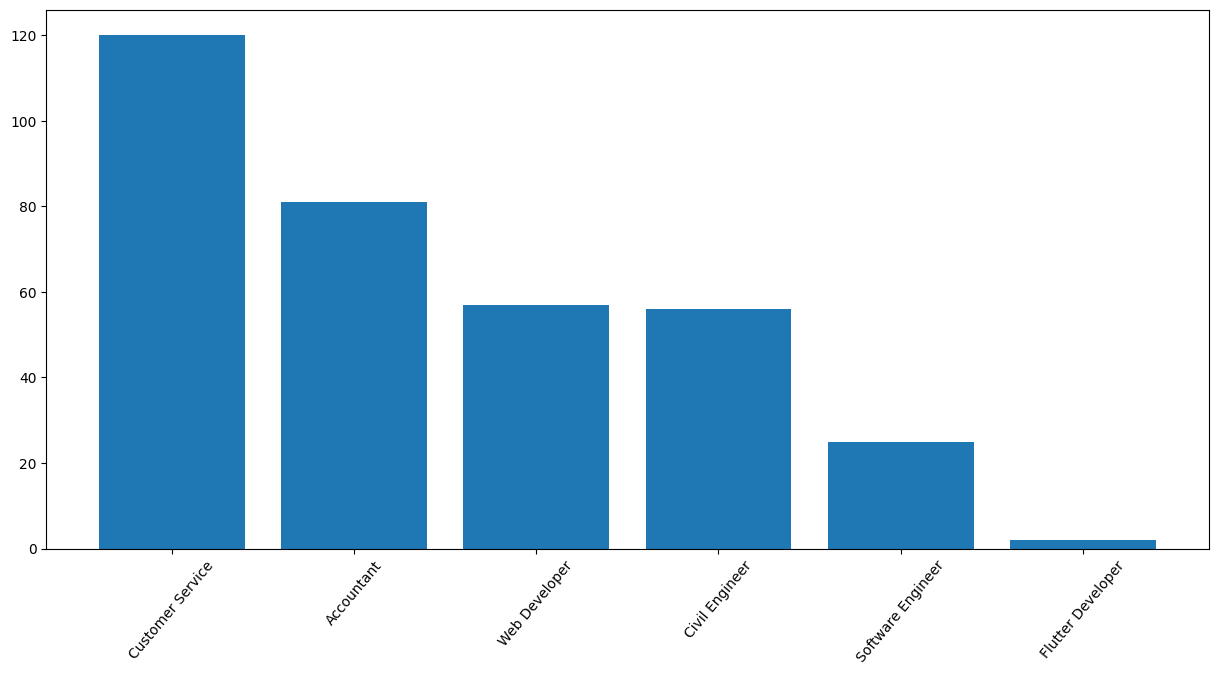

In [8]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 50)
plt.bar(jobsName,jobsNum)
plt.show()

### Cleaning Data

In [9]:
# check for null values 
print("Null values: ",jobs_data.isnull().sum())

duplicates = jobs_data[jobs_data.duplicated()]
print("number of duplicates rows: ", len(duplicates))

Null values:  Unnamed: 0          0
job_title           0
company_name        0
job_location        0
job_requirement    11
job_description     4
dtype: int64
number of duplicates rows:  0


In [10]:
jobs_data.dropna(subset=["job_description"],inplace=True)
jobs_data.dropna(subset=["job_requirement"],inplace=True)

print("new shape: ", jobs_data.shape)
jobs_data.head(5)

new shape:  (326, 6)


,Unnamed: 0,job_title,company_name,job_location,job_requirement,job_description
0,0,Software Engineer,qTech. -,"Mansoura, Dakahlia, Egypt",More than 1 year of experience.Bachelor’s degr...,Using the software as intended to analyze its ...
1,1,Software Engineer,HITS Solutions -,"Nasr City, Cairo, Egypt",Job Requirements:Bachelor’s Degree in computer...,"General duties and responsibilities:Design, bu..."
2,2,Software Engineer,Noases -,"Cairo, Egypt",Bachelor of Science degree or higher in Compu...,Understand the problem and requirements and cr...
3,3,Software Engineer,SE Wiring Systems EGYPT -,"6th of October, Giza, Egypt",Bachelor degree in computer scienceFresh gradu...,Support both the IT manager & Central IT engin...
4,4,Software Engineer,eelu -,"Dokki, Giza, Egypt",Qualifications:BSc degree from Telecommunicati...,Responsible for all network and security relat...


In [11]:
### clean the job description from stop words ###
def text_preprocessing(text: list,
        punctuations=r'''!()-[]{};:'"\,<>./?@$%^&*_“~''',
        stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'was', 'but','this',
                    'were', 'with', 'of', 'also',
                    'on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as','or','so','their','only','can',
                    'now','A','much','could','usually',"to",'that','them','$','§','”','at','●','←','…','•','–']) -> list:
    
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    text = text.split(' ')
    text = [x for x in text if x != '']
    text = [x for x in text if x not in stop_words]

    return text

def create_unique_word_dict(text: list) -> dict:
    words = list(set(text))
    words.sort()

    unique_word_dict = []
    for i, word in enumerate(words):
        unique_word_dict.append(word)

    return unique_word_dict


In [12]:
Description =  []
Requirements = []

job_description = jobs_data.iloc[:,5].to_list()
job_requirements = jobs_data.iloc[:,4].to_list()
## 1. Exctract words
for i in range(jobs_data.shape[0]):
    try:    
        Description.append(text_preprocessing(job_description[i]))
        Requirements.append(text_preprocessing(job_requirements[i]))
    except AttributeError:
        continue
    
merged_list = [item for sublist in Requirements for item in sublist]

## 2. stemming words
nltk.download("punkt")
ps = PorterStemmer()
for i in range(len(merged_list)):
    merged_list[i] = ps.stem(merged_list[i])
## 3. unique words 
uniqueWords = create_unique_word_dict(merged_list)

map = {}
c = 0
for w1 in uniqueWords:
    for w2 in merged_list:
        if w1 == w2:
            c+=1
    map.update({
        w1: c
    })

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Skills Frequency

In [13]:
skills = ["c++",'c#','softwar','python','java','net','sql','databas','git','oop','javascript','css','html','mvc','teamwork',
          'bsc','statist','analysi','machin','nosql','xml','node','react','commun','english','listen','account','ms','financi']

skills2 = ["C++",'C#','software','python','java','.Net','SQL','Databas','Git','OOP','javascript','css','HTML','MVC Model','teamwork',
          'Bachelor of CS','statisticals','analysis','ML','NoSQL','xml','Node','react','communication',
          'English','listening','accountant','microsoft office','financial']

mostPrefered_skills = {}
n = len(skills)
for i in range(n):
    mostPrefered_skills.update({
        skills2[i] : map[skills[i]]
    })

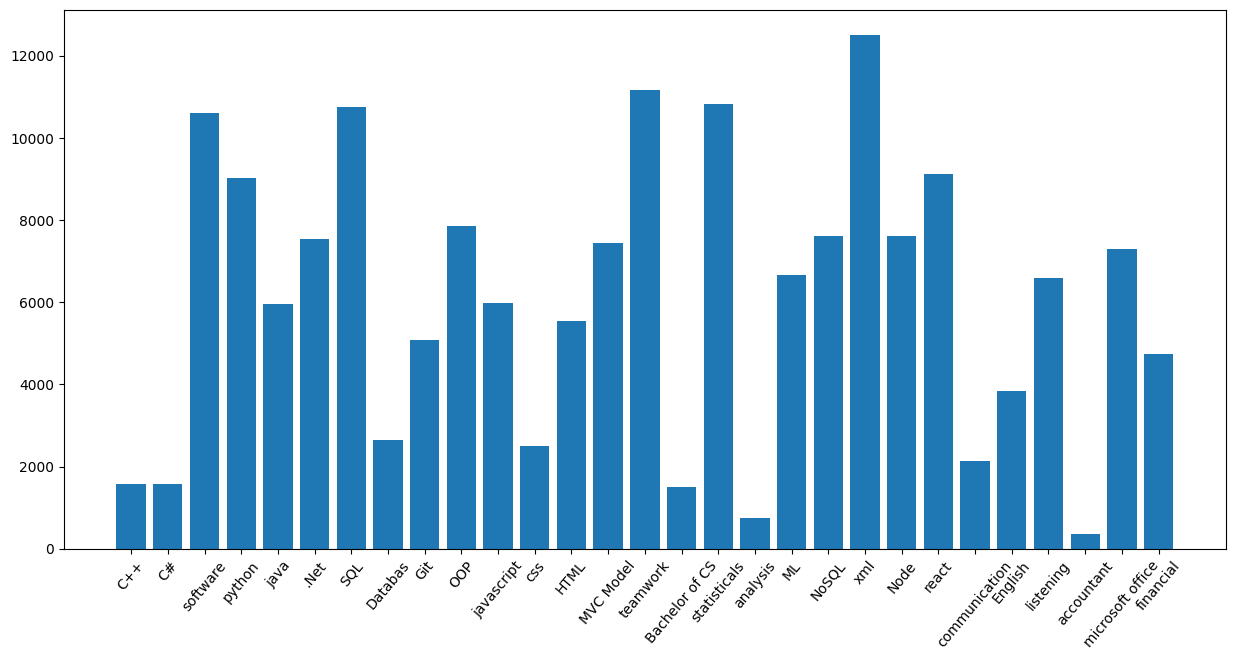

In [14]:
y = list(mostPrefered_skills.values())
y_np = np.array(y)
labels = list(mostPrefered_skills.keys())
labels_np = np.array(labels)

plt.figure(figsize=(15, 7))
plt.xticks(rotation = 50)
plt.bar(labels_np,y_np)
plt.show()

In [26]:
s = dict(sorted(mostPrefered_skills.items(),key= lambda item: item[1],reverse=True))
s.keys()

dict_keys(['xml', 'teamwork', 'statisticals', 'SQL', 'software', 'react', 'python', 'OOP', 'NoSQL', 'Node', '.Net', 'MVC Model', 'microsoft office', 'ML', 'listening', 'javascript', 'java', 'HTML', 'Git', 'financial', 'English', 'Databas', 'css', 'communication', 'C++', 'C#', 'Bachelor of CS', 'analysis', 'accountant'])

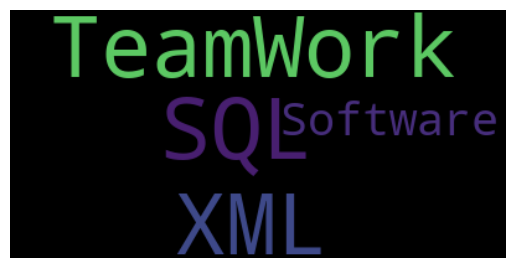

In [15]:
mostFrequentSkills = 'XML TeamWork SQL Software'
wordcloud = WordCloud().generate(mostFrequentSkills)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()